# Tensors

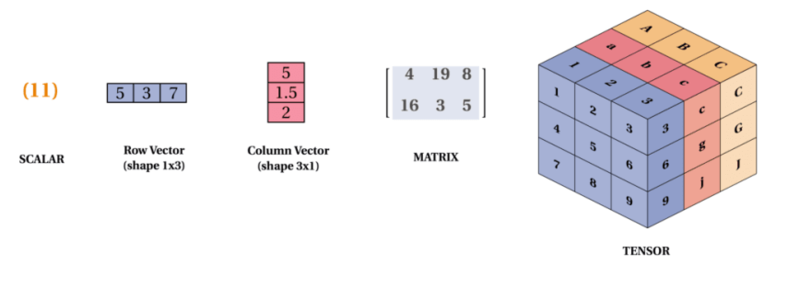

In [1]:
import numpy as np
import torch

## Directly from data

In [2]:
data = [
    [1,2], [3,4], [5,6]
]

data_tensor = torch.tensor(data)
data_tensor

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## From a numpy array

In [3]:
arr = np.array(data)
arr_tensor = torch.from_numpy(arr)

print(f'Numpy arr values : \n {arr} \n')
print(f'Tensor arr_tensor values : \n {arr_tensor}')

Numpy arr values : 
 [[1 2]
 [3 4]
 [5 6]] 

Tensor arr_tensor values : 
 tensor([[1, 2],
        [3, 4],
        [5, 6]])


- 실제 data를 복사하는 것이 아닌, 메모리 주소만 저장해서 불러옴 
- '얕은 복사'





In [4]:
np.multiply(arr, 2, out=arr)

print(f'Numpy arr after * 2 operation : \n {arr} \n')
print(f'Tensor arr_tensor value after modifying numpy array : \n {arr_tensor}')

Numpy arr after * 2 operation : 
 [[ 2  4]
 [ 6  8]
 [10 12]] 

Tensor arr_tensor value after modifying numpy array : 
 tensor([[ 2,  4],
        [ 6,  8],
        [10, 12]])


## From another tensor

In [5]:
# 1로만 텐서를 채움 
x_ones = torch.ones_like(data_tensor)
x_ones

tensor([[1, 1],
        [1, 1],
        [1, 1]])

In [6]:
# 랜덤한 실수로 텐서를 만든다. 
x_rand = torch.rand_like(data_tensor, dtype=torch.float)
x_rand

tensor([[0.3252, 0.0530],
        [0.0660, 0.3686],
        [0.1047, 0.1629]])

## With random or constant values

In [7]:
shape =  (2, 3,)
rand_tensor = torch.randn(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor : \n {rand_tensor} \n')
print(f'Ones Tensor : \n {ones_tensor} \n')
print(f'Zeros Tensor : \n {zeros_tensor} \n')

Random Tensor : 
 tensor([[-0.9965,  0.7932,  0.5568],
        [ 0.5810,  0.2330,  1.4948]]) 

Ones Tensor : 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



# Attributes of a Tensor
- Tensor에 존재하는 변수들 

In [8]:
tensor = torch.rand(3,4)

print(f'Shape of tensor : {tensor.shape}')
print(f'Datatype of tensor : {tensor.dtype}')
# device의 default 값은 cpu 
print(f'Device tensor is stored on : {tensor.device}')

Shape of tensor : torch.Size([3, 4])
Datatype of tensor : torch.float32
Device tensor is stored on : cpu


# Operations of Tensor
- 특정 코드는 cpu, 특정 코드는 gpu 등 조절이 가능하다. 

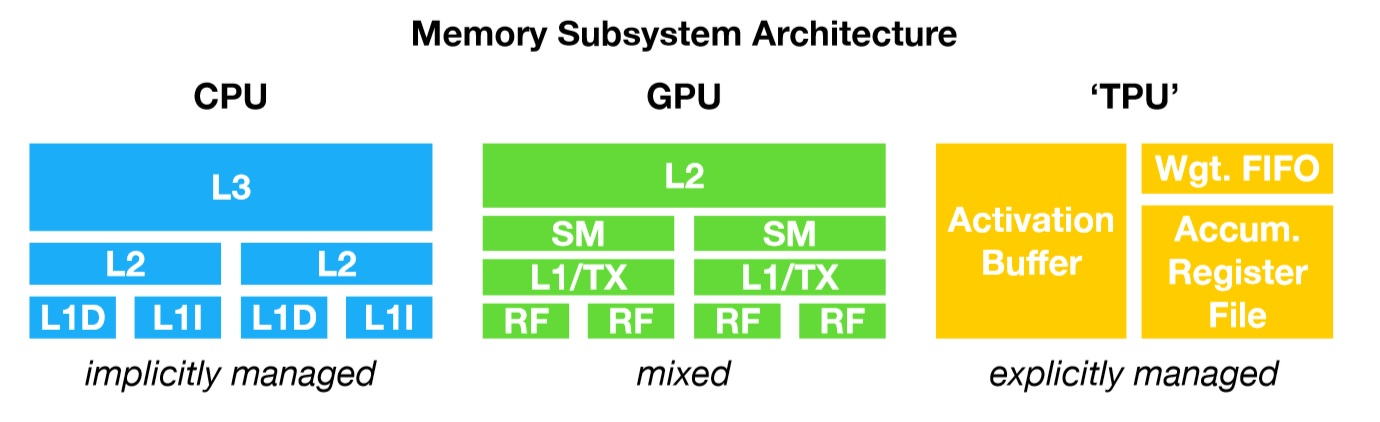

In [9]:
# GPU로 연결을 바꿨을 때 사용 가능한지 아래 코드로 확인할 수 있다. 
if torch.cuda.is_available() :
  tensor = tensor.to('cuda')

tensor.device

device(type='cuda', index=0)

## Indexing and Slicing

In [12]:
data = [
    [1,2,3], [4,5,6], [7,8,9]
]

tensor = torch.tensor(data, dtype=torch.float)

print(tensor)
print('-'*50)

print('First Row ', tensor[0])
print('Last Row', tensor[-1])
print('First Column', tensor[:, 0])
print('Last Column 1', tensor[:, -1])
print('Last column2:', tensor[..., -1])

print('-'*50)
tensor[:, 1] = 0
tensor[1] = 0
print(tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
--------------------------------------------------
First Row  tensor([1., 2., 3.])
Last Row tensor([7., 8., 9.])
First Column tensor([1., 4., 7.])
Last Column 1 tensor([3., 6., 9.])
Last column2: tensor([3., 6., 9.])
--------------------------------------------------
tensor([[1., 0., 3.],
        [0., 0., 0.],
        [7., 0., 9.]])


## Joining Tensors

In [13]:
t0 = torch.cat([tensor, tensor], dim=0)
t0

tensor([[1., 0., 3.],
        [0., 0., 0.],
        [7., 0., 9.],
        [1., 0., 3.],
        [0., 0., 0.],
        [7., 0., 9.]])

In [15]:
t1 = torch.cat([tensor, tensor], dim=1)
t1

tensor([[1., 0., 3., 1., 0., 3.],
        [0., 0., 0., 0., 0., 0.],
        [7., 0., 9., 7., 0., 9.]])

## Arithmetic Operations (연산)

### torch.mm
- broad casting이 안 되는 연산
- broad casting이란? 연산 시 부족한 부분을 자동으로 생성해서 채워주는 것

In [19]:
mat1 = torch.randn(2,3)
mat2 = torch.randn(3,3)

In [20]:
mat1

tensor([[ 0.5973, -0.2520, -1.2916],
        [ 0.9228, -0.7657,  0.3375]])

In [21]:
mat2

tensor([[-1.9488,  0.3604, -1.2645],
        [-1.6023, -0.0481, -1.3792],
        [-0.6998, -0.4941,  0.0383]])

In [22]:
# (2,3)과 (3,3)은 (2,3)의 형태로 결합 가능하다. 
torch.mm(mat1, mat2)

tensor([[ 0.1436,  0.8656, -0.4572],
        [-0.8076,  0.2027, -0.0978]])

In [23]:
# (3,3) shape와 (2,3)shape를 결합할 수 없다. 
torch.mm(mat2, mat1)

RuntimeError: ignored

### torch.mul
- broadcasting 가능 

In [24]:
a = torch.randn(3)
a

tensor([-1.2402, -0.8905, -0.0505])

In [25]:
torch.mul(a, 100)

tensor([-124.0232,  -89.0480,   -5.0467])

In [26]:
b = torch.randn(4, 1)
b

tensor([[-1.3673],
        [-0.6298],
        [ 0.5474],
        [ 2.4904]])

In [27]:
c = torch.randn(1, 4)
c

tensor([[-0.9972, -0.0040,  0.9939,  0.0442]])

In [28]:
torch.mul(b, c)

tensor([[ 1.3635e+00,  5.4738e-03, -1.3589e+00, -6.0474e-02],
        [ 6.2802e-01,  2.5212e-03, -6.2592e-01, -2.7854e-02],
        [-5.4591e-01, -2.1916e-03,  5.4409e-01,  2.4213e-02],
        [-2.4834e+00, -9.9699e-03,  2.4751e+00,  1.1015e-01]])

### torch.matnul
- tensor끼리 곱할 때 shape에 따라 결과가 달라짐
- 내적의 개념, 차원이 달라진다.

In [31]:
# vector * vector
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)
torch.matmul(tensor1, tensor2).size()

torch.Size([])

In [34]:
# 벡터 반환 
torch.matmul(tensor1, tensor2)

tensor(-1.4846)

In [38]:
# matrix * matrix
tensor1 = torch.randn(3, 4)
tensor2= torch.randn(4)
torch.matmul(tensor1, tensor2).size()

torch.Size([3])

In [39]:
torch.matmul(tensor1, tensor2)

tensor([-0.0120,  2.2808, -2.7778])

In [40]:
# betched matrix * broadcasted vector 
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3])

In [41]:
torch.matmul(tensor1, tensor2)

tensor([[-2.1628, -1.5304,  0.4349],
        [-1.6693,  0.6161,  0.0931],
        [-0.2088,  4.0921,  0.0927],
        [-5.2222,  1.4298,  0.1709],
        [-2.0670, -0.7546, -0.3133],
        [-0.3564,  0.1612,  0.7585],
        [-4.6106, -2.9167, -0.1897],
        [-1.3496, -3.8529, -2.3051],
        [-2.1183,  1.0357,  0.3260],
        [-0.1973, -0.0792, -1.1667]])

In [42]:
# batched matrix * batched matrix 
# 첫 번째 matrix의 끝자리와 두 번째 matrix의 -2번째 자리가 같아야 한다. 

tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])

In [43]:
# batched matrix * broadcasted matrix
# 첫 번째 matrix의 끝자리와 두 번째 matrix의 -2번째 자리가 같아야 한다. 

tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)
torch.matmul(tensor1, tensor2).size()

torch.Size([10, 3, 5])

## Single-elemnet tensors

In [44]:
tensor2

tensor([[-0.2365, -0.5157,  0.4232, -0.8831,  2.4174],
        [-0.6590, -0.1408,  1.2275,  0.4747, -1.6456],
        [-0.2554, -0.2066,  0.2094, -0.4539,  1.2935],
        [-1.3433, -1.4117, -0.2130,  0.1992,  1.7225]])

In [45]:
agg = tensor2.sum()
agg

tensor(0.0030)

In [46]:
agg_item = agg.item()
agg_item

0.0029785633087158203

In [49]:
agg = tensor2.sum()

# get a value
agg_item = agg.item() 
print(agg_item, type(agg_item)) 

0.0029785633087158203 <class 'float'>


## In-place opearations

In [51]:
# 단순 add 함수는 inplace가 되지 않는다. 
print(tensor2, '\n')
print(f'{tensor2.add(5)}\n')
print('-'*50)
print(tensor2, '\n')

# add_ 함수는 inplace를 한다. 
tensor2.add_(5)
print(tensor2)

tensor([[4.7635, 4.4843, 5.4232, 4.1169, 7.4174],
        [4.3410, 4.8592, 6.2275, 5.4747, 3.3544],
        [4.7446, 4.7934, 5.2094, 4.5461, 6.2935],
        [3.6567, 3.5883, 4.7870, 5.1992, 6.7225]]) 

tensor([[ 9.7635,  9.4843, 10.4232,  9.1169, 12.4174],
        [ 9.3410,  9.8592, 11.2275, 10.4747,  8.3544],
        [ 9.7446,  9.7934, 10.2094,  9.5461, 11.2935],
        [ 8.6567,  8.5883,  9.7870, 10.1992, 11.7225]])

--------------------------------------------------
tensor([[4.7635, 4.4843, 5.4232, 4.1169, 7.4174],
        [4.3410, 4.8592, 6.2275, 5.4747, 3.3544],
        [4.7446, 4.7934, 5.2094, 4.5461, 6.2935],
        [3.6567, 3.5883, 4.7870, 5.1992, 6.7225]]) 

tensor([[ 9.7635,  9.4843, 10.4232,  9.1169, 12.4174],
        [ 9.3410,  9.8592, 11.2275, 10.4747,  8.3544],
        [ 9.7446,  9.7934, 10.2094,  9.5461, 11.2935],
        [ 8.6567,  8.5883,  9.7870, 10.1992, 11.7225]])


# Bridge with numpy

## Tensor to Numpy array

In [56]:
t = torch.ones(5)
print(f't : {t}')

# 얕은 복사 
n = t.numpy()
print(f'n : {n}')

t : tensor([1., 1., 1., 1., 1.])
n : [1. 1. 1. 1. 1.]


In [57]:
t.add(1)
print(f't : {t}')
print(f'n : {n}')

t : tensor([1., 1., 1., 1., 1.])
n : [1. 1. 1. 1. 1.]


In [58]:
# add_로 inplace 적용, numpy에도 반영됨 
t.add_(1)
print(f't : {t}')
print(f'n : {n}')

t : tensor([2., 2., 2., 2., 2.])
n : [2. 2. 2. 2. 2.]


## Numpy array to Tensor

In [59]:
n = np.ones(5)
t = torch.from_numpy(n)

In [60]:
n

array([1., 1., 1., 1., 1.])

In [61]:
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [62]:
# tensor에도 반영 
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
